# MACD (Moving Average Convergence Divergence) Technical Indicator for Stock Analysis
# 

# Importing Important Library

In [40]:
import pandas_datareader as pdr
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Importing DataSet from Yahoo Finance

In [41]:
df = pdr.get_data_yahoo('SBIN.NS', 
                          start=dt.datetime(2020, 9, 1), 
                          end=dt.datetime.now())
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-09-01,218.899994,211.199997,213.100006,218.100006,75048313.0,216.104813
2020-09-02,219.000000,212.300003,218.250000,216.250000,47608088.0,214.271729
2020-09-03,218.250000,212.300003,217.500000,213.149994,38594129.0,211.200089
2020-09-04,212.300003,205.899994,210.000000,206.600006,54435758.0,204.710022
2020-09-07,209.649994,205.399994,207.500000,207.899994,35687359.0,205.998108
...,...,...,...,...,...,...
2021-11-17,505.399994,491.000000,493.850006,498.149994,20488483.0,498.149994
2021-11-18,506.200012,492.299988,499.100006,503.799988,22471070.0,503.799988
2021-11-22,506.000000,477.500000,506.000000,486.399994,28800269.0,486.399994


# Plotting the curve for Closing Price

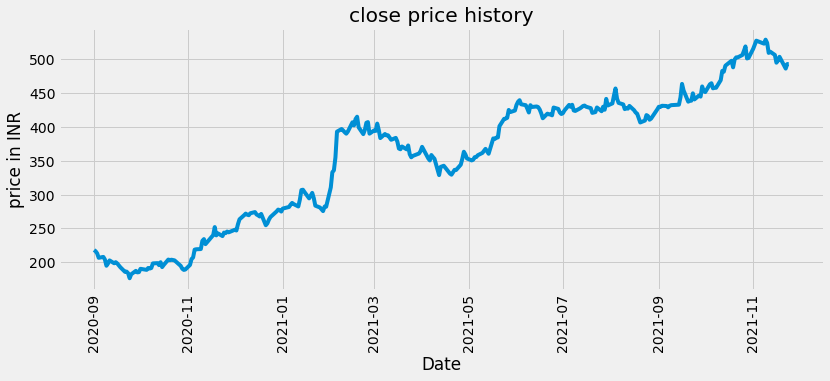

In [42]:
plt.figure(figsize=(12.2,4.5))
plt.plot(df['Close'], label='Close')
plt.xticks(rotation=90)
plt.title('close price history')
plt.xlabel('Date')
plt.ylabel('price in INR')
plt.show()

# Code for MACD

In [43]:
se=df.Close.ewm(span=12, adjust=False).mean()
le=df.Close.ewm(span=26, adjust=False).mean()
MACD=se-le
signal=MACD.ewm(span=9, adjust=False).mean()
signal.tail()

Date
2021-11-17    13.204197
2021-11-18    12.084132
2021-11-22    10.741033
2021-11-23     9.410163
2021-11-24     8.136872
Name: Close, dtype: float64

# Plotting the MACD and Signal curve

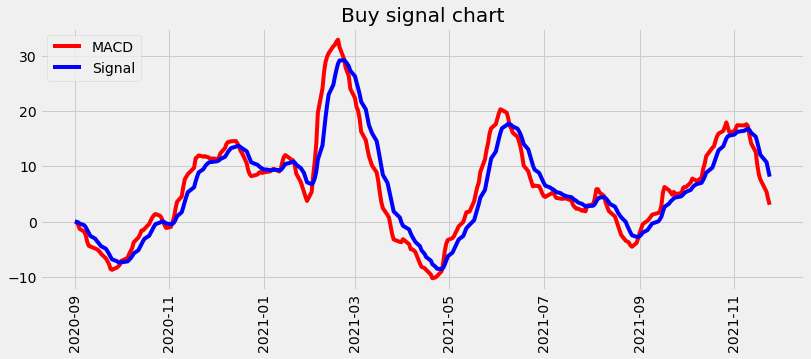

In [44]:
plt.figure(figsize=(12.2,4.5))
plt.plot(df.index, MACD, label='MACD',color='red')
plt.plot(df.index, signal, label='Signal', color='blue')
plt.xticks(rotation=90)
plt.title('Buy signal chart')
plt.legend(loc='upper left')
plt.show()

# Storing MACD and Signal value to DataSet

In [45]:
df['MACD']=MACD
df['Signal Line']=signal
df.tail()

,High,Low,Open,Close,Volume,Adj Close,MACD,Signal Line
Date,,,,,,,,
2021-11-17,505.399994,491.000000,493.850006,498.149994,20488483.0,498.149994,8.574612,13.204197
2021-11-18,506.200012,492.299988,499.100006,503.799988,22471070.0,503.799988,7.603873,12.084132
2021-11-22,506.000000,477.500000,506.000000,486.399994,28800269.0,486.399994,5.368635,10.741033
2021-11-23,495.399994,480.000000,485.250000,493.049988,20000371.0,493.049988,4.086682,9.410163
2021-11-24,500.000000,489.049988,495.799988,493.149994,13959492.0,493.149994,3.043710,8.136872


# Code for Buy and Sell Strategy

In [46]:
def buy_sell(signal):
    buy=[]
    sell=[]
    flag=-1
    for i in range(0,len(signal)):
        if signal['MACD'][i]>signal['Signal Line'][i]:
            sell.append(np.nan)
            if flag !=1:
                buy.append(signal['Close'][i])
                flag=1
            else:
                     buy.append(np.nan)
                    
        elif signal['MACD'][i]<signal['Signal Line'][i]:
            buy.append(np.nan)
            if flag !=0:
                sell.append(signal['Close'][i])
                flag=0
            else:
                    sell.append(np.nan)
        else:
            buy.append(np.nan) 
            sell.append(np.nan) 
    return(buy,sell) 

In [47]:
a=buy_sell(df)
df['buyprice']=a[0]
df['sellprice']=a[1]
df.tail()

,High,Low,Open,Close,Volume,Adj Close,MACD,Signal Line,buyprice,sellprice
Date,,,,,,,,,,
2021-11-17,505.399994,491.000000,493.850006,498.149994,20488483.0,498.149994,8.574612,13.204197,NaN,NaN
2021-11-18,506.200012,492.299988,499.100006,503.799988,22471070.0,503.799988,7.603873,12.084132,NaN,NaN
2021-11-22,506.000000,477.500000,506.000000,486.399994,28800269.0,486.399994,5.368635,10.741033,NaN,NaN
2021-11-23,495.399994,480.000000,485.250000,493.049988,20000371.0,493.049988,4.086682,9.410163,NaN,NaN
2021-11-24,500.000000,489.049988,495.799988,493.149994,13959492.0,493.149994,3.043710,8.136872,NaN,NaN


# Generating Buy and Sell Signal

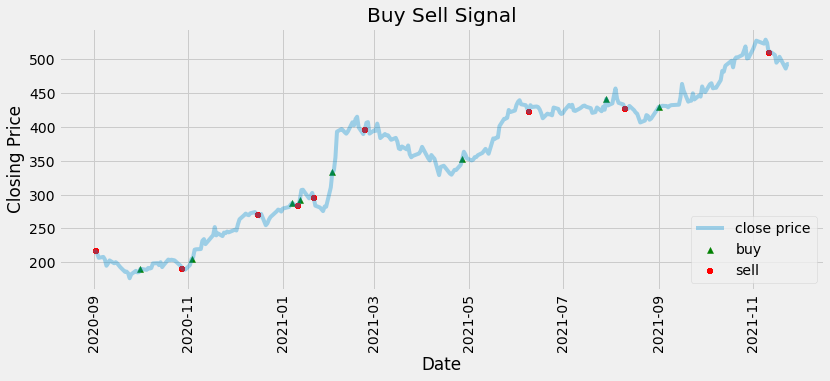

In [48]:
plt.figure(figsize=(12.2,4.5))
plt.scatter(df.index, df['buyprice'], color='green', label='buy', marker='^', alpha=1)
plt.scatter(df.index, df['sellprice'], color='red', label='sell', marker='+', alpha=1)
plt.plot(df['Close'], label='close price', alpha=.35)
plt.title('Buy Sell Signal')
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(loc='lower right')
plt.show()